**Import the neccessary libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

2024-03-08 13:28:39.728876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 13:28:39.729007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 13:28:39.998360: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Load the Data drop id col.:**

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)
display('Train',train.head())
display('Train Description',train.describe())

'Train'

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


'Train Description'

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Check for the null values:**

In [3]:
display('Train Null Counts', train.isnull().sum())
print('\n')
display('Test Null Counts', test.isnull().sum())

'Train Null Counts'

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

'Test Null Counts'

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [4]:
# list(feat_importances.nlargest(20).index)

**Check for the duplicated values:**

In [5]:
train.duplicated().sum()

0

**Check the shape of the train and test datasets:**

In [6]:
train.shape, test.shape

((19219, 34), (12814, 27))

**Data Exploration:**

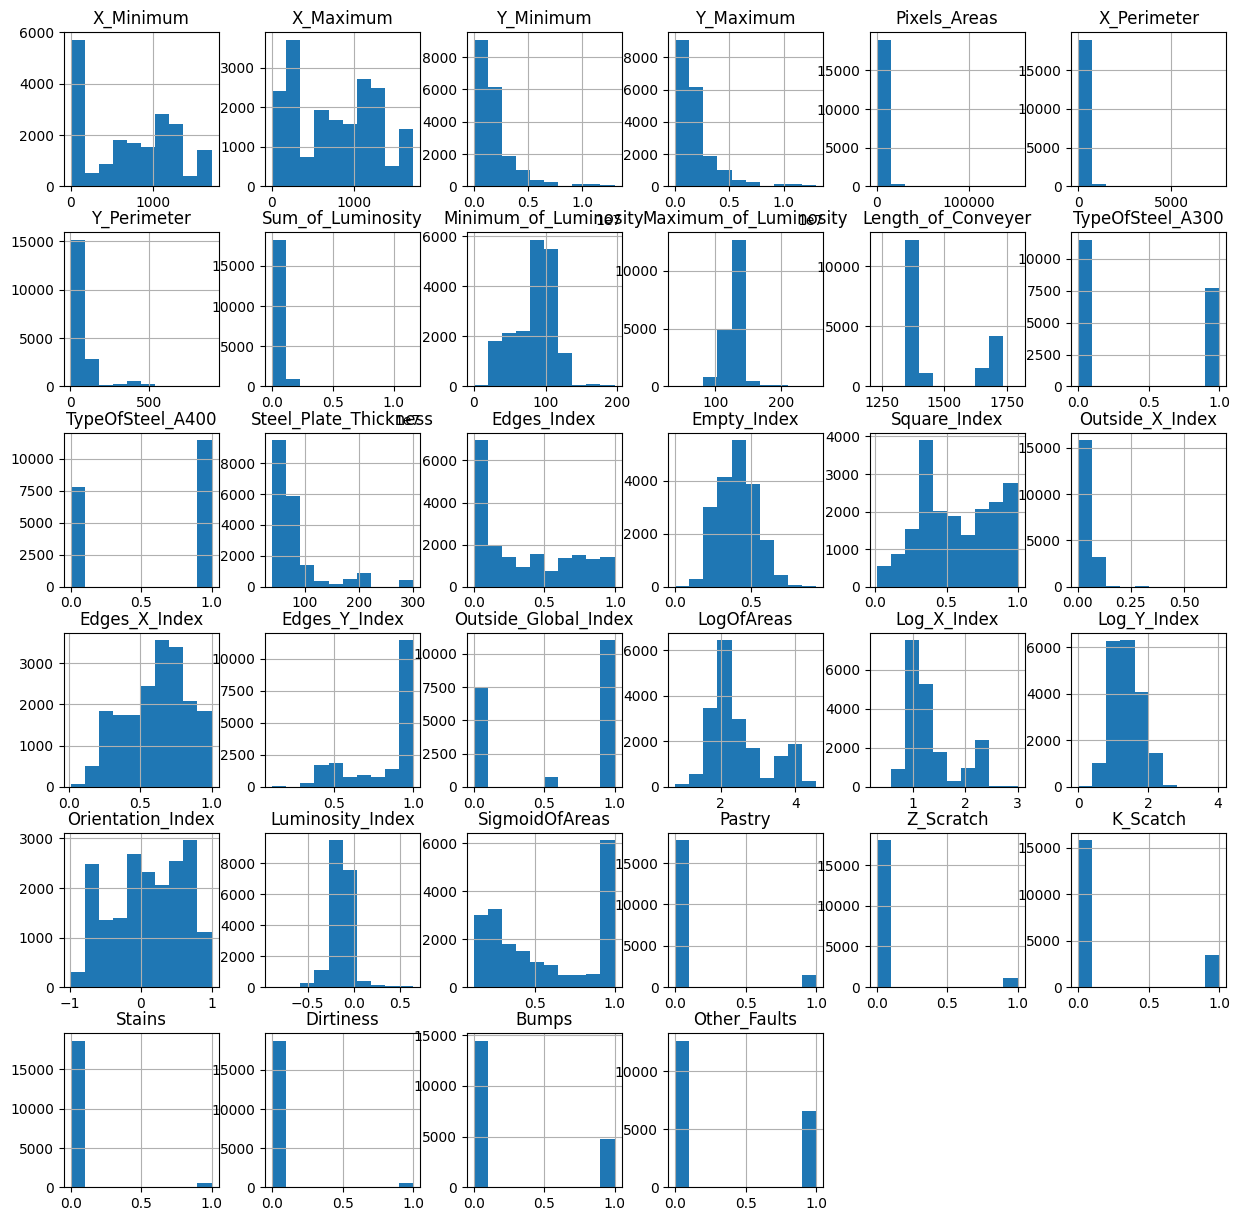

In [7]:
train.hist(figsize=(15,15))
plt.show()

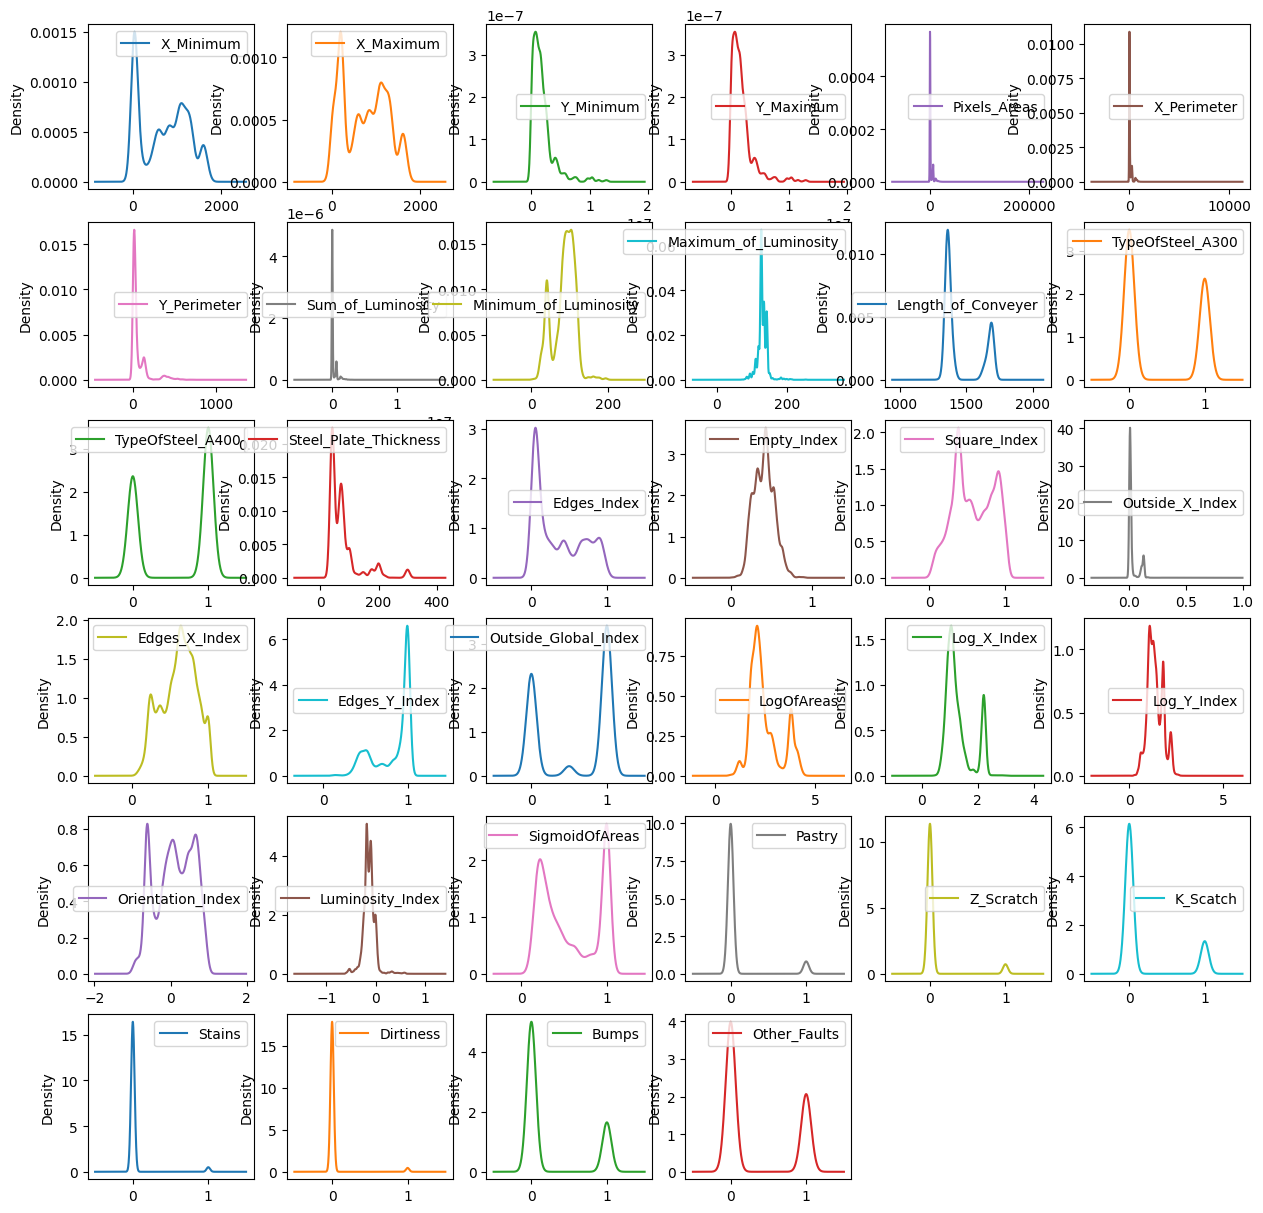

In [8]:
train.plot(kind="density", layout=(6,6), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

**Make labels, data and dict(labels) for our final model:**

In [9]:
labels = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
X = train.drop(labels, axis = 1)
y = train[labels]
label = dict(train[labels])

**Feature Extraction:**

In [10]:
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances

[0.0497916  0.03993622 0.03026548 0.0302856  0.03964868 0.03348966
 0.03664328 0.03492861 0.04466905 0.03112658 0.04731297 0.01548374
 0.01328284 0.04197362 0.03891344 0.03356764 0.03486178 0.04700212
 0.03370156 0.04197025 0.01336547 0.05852191 0.05571496 0.03754166
 0.03869888 0.03333424 0.04396816]


X_Minimum                0.049792
X_Maximum                0.039936
Y_Minimum                0.030265
Y_Maximum                0.030286
Pixels_Areas             0.039649
X_Perimeter              0.033490
Y_Perimeter              0.036643
Sum_of_Luminosity        0.034929
Minimum_of_Luminosity    0.044669
Maximum_of_Luminosity    0.031127
Length_of_Conveyer       0.047313
TypeOfSteel_A300         0.015484
TypeOfSteel_A400         0.013283
Steel_Plate_Thickness    0.041974
Edges_Index              0.038913
Empty_Index              0.033568
Square_Index             0.034862
Outside_X_Index          0.047002
Edges_X_Index            0.033702
Edges_Y_Index            0.041970
Outside_Global_Index     0.013365
LogOfAreas               0.058522
Log_X_Index              0.055715
Log_Y_Index              0.037542
Orientation_Index        0.038699
Luminosity_Index         0.033334
SigmoidOfAreas           0.043968
dtype: float64

**Plot the important features:**

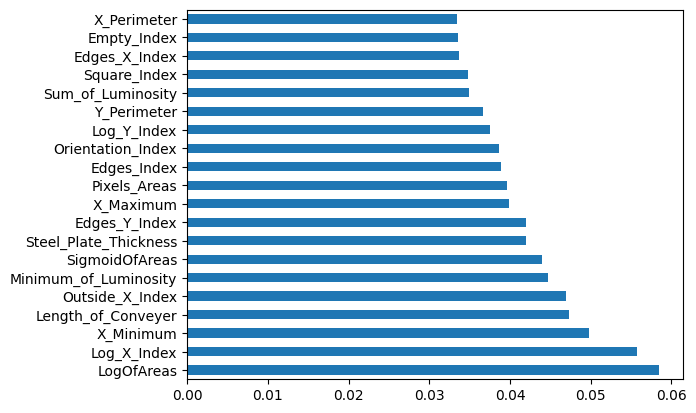

In [11]:
feat_importances.nlargest(20).plot(kind = 'barh');

**Function to give a dict. of important features according how much we want by priority:**

In [12]:
def get_important_features(dataFrame, importances, numberOfFeatures):
    features = list(importances.nlargest(numberOfFeatures).index)
    important_features = dict(dataFrame[features])
    return important_features

In [13]:
important_features_train = get_important_features(X, feat_importances, 22)
important_features_test = get_important_features(test, feat_importances, 22)

**As we are using Tensorflow Decision Forests so we have to prepare our data like this:**

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((important_features_train, label)).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices(important_features_test).batch(128)

**Model 1: GradientBoostedModel:**

In [15]:
model = tfdf.keras.GradientBoostedTreesModel(
    multitask=[tfdf.keras.MultiTaskItem(label=l, task=tfdf.keras.Task.CLASSIFICATION) for l in labels],
    verbose=1,
)
model.fit(train_dataset)

Use /tmp/tmp7ey01_lq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:07.930199. Found 19219 examples.
Training model...
Model trained in 0:00:22.134027
Compiling model...


[INFO 24-03-08 13:30:11.9573 UTC kernel.cc:1233] Loading model from path /tmp/tmp7ey01_lq/model/ with prefix c2daf83e9f944105_0
[INFO 24-03-08 13:30:11.9702 UTC quick_scorer_extended.cc:903] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-03-08 13:30:11.9709 UTC abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-03-08 13:30:11.9709 UTC kernel.cc:1061] Use fast generic engine
[INFO 24-03-08 13:30:11.9796 UTC kernel.cc:1233] Loading model from path /tmp/tmp7ey01_lq/model/ with prefix c2daf83e9f944105_1
[INFO 24-03-08 13:30:11.9897 UTC kernel.cc:1061] Use fast generic engine
[INFO 24-03-08 13:30:11.9979 UTC kernel.cc:1233] Loading model from path /tmp/tmp7ey01_lq/model/ with prefix c2daf83e9f944105_2
[INFO 24-03-08 13:30:12.0063 UTC kernel.cc:1061] Use fast generic engine
[INFO 24-03-08 13:30:12.0141 UTC kernel.cc:1233] Loading model from path /tmp/tmp7ey01_lq/model/ with prefix c2d

Model compiled.


**Make prediction on test dataset:**

In [16]:
prediction = model.predict(test_dataset)

101/101 [==============================] - 1s 4ms/step


In [17]:
id = pd.read_csv('/kaggle/input/playground-series-s4e3/sample_submission.csv')['id']

In [18]:
prediction_pd = pd.DataFrame({
    "id": id,
    "Pastry": prediction["Pastry"].flatten(),
    "Z_Scratch": prediction["Z_Scratch"].flatten(),
    "K_Scatch": prediction["K_Scatch"].flatten(),
    "Stains": prediction["Stains"].flatten(),
    "Dirtiness": prediction["Dirtiness"].flatten(),
    "Bumps": prediction["Bumps"].flatten(),
    "Other_Faults": prediction["Other_Faults"].flatten(),
})

prediction_pd.to_csv("submission.csv",index=False)

prediction_pd

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.516234,0.003528,0.005115,0.002712,0.007403,0.171567,0.349982
1,19220,0.340664,0.005765,0.018864,0.002712,0.128368,0.241366,0.338718
2,19221,0.005018,0.040244,0.028499,0.003437,0.006499,0.343233,0.456386
3,19222,0.145182,0.004759,0.004285,0.003226,0.014605,0.269253,0.428767
4,19223,0.005710,0.005193,0.004536,0.003488,0.006152,0.457444,0.363853
...,...,...,...,...,...,...,...,...
12809,32028,0.015080,0.117461,0.004395,0.002712,0.010633,0.203684,0.350971
12810,32029,0.166316,0.006116,0.029776,0.008929,0.179096,0.223246,0.411404
12811,32030,0.003550,0.002751,0.933577,0.002928,0.002485,0.008550,0.078376
12812,32031,0.385642,0.008073,0.020524,0.002712,0.063110,0.135162,0.319782


**Model 2: RFModel:**

**Model 3: CartModel:**